In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
df_num = pd.read_csv('df_training_combined_numeric.csv')
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,target
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,functional
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,functional
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,functional
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,non functional
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,functional


In [149]:
df_num = df_num.drop('num_private', axis=1)

In [150]:
# Briniging in date-recorded to merge with df_num
date_recorded = pd.read_csv('date_recorded.csv')
date_recorded.head()

,id,date_recorded
0,69572,2011-03-14
1,8776,2013-03-06
2,34310,2013-02-25
3,67743,2013-01-28
4,19728,2011-07-13


In [151]:
# Trying to create an 'age' variable for the water pumps
date_recorded['date_recorded'] = pd.to_datetime(date_recorded['date_recorded'])
date_recorded.dtypes

id                        int64
date_recorded    datetime64[ns]
dtype: object

In [152]:
date_recorded['year_recorded'] = date_recorded['date_recorded'].dt.year
date_recorded.head()

,id,date_recorded,year_recorded
0,69572,2011-03-14,2011
1,8776,2013-03-06,2013
2,34310,2013-02-25,2013
3,67743,2013-01-28,2013
4,19728,2011-07-13,2011


In [153]:
date_recorded.dtypes

id                        int64
date_recorded    datetime64[ns]
year_recorded             int64
dtype: object

In [154]:
print(df_num.shape)
print(date_recorded.shape)

(59400, 10)
(59400, 3)


In [155]:
df_num['year_recorded'] = date_recorded['year_recorded']
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013
4,19728,0.0,0,31.130847,-1.825359,18,1,0,0,functional,2011


In [156]:
df_num['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [157]:
df_num['construction_year'].median()

1986.0

In [158]:
df_num['construction_year'] = df_num['construction_year'].replace(0, 1986)
df_num['construction_year'].value_counts()

1986    21143
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [159]:
# Let's check out the characteristics of construction_year=1986
df_temp = df_num[['construction_year', 'target']]
df_temp_1 = df_temp[df_temp['construction_year']==1986]
df_temp_1.head()

,construction_year,target
3,1986,non functional
4,1986,functional
6,1986,non functional
7,1986,non functional
8,1986,non functional


In [160]:
df_temp_1.target.value_counts()

functional                 10767
non functional              8553
functional needs repair     1823
Name: target, dtype: int64

In [161]:
df_num.target.value_counts() # 'functional needs repair' only represents about 13% of the whole dataset

functional                 32259
non functional             22824
functional needs repair     4317
Name: target, dtype: int64

In [162]:
df_num['age'] = df_num['year_recorded'] - df_num['construction_year']
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25


In [163]:
# So it might be useful for train a model to just recognize between 2 classes:
target_encoded = []

for row in df_num['target']:
    if row == 'functional':
        target_encoded.append(1)
    elif row == 'functional needs repair':
        target_encoded.append(1)
    else:
        target_encoded.append(0)

df_num['target_encoded'] = target_encoded
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25,1


In [164]:
df_num.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'construction_year',
       'target', 'year_recorded', 'age', 'target_encoded'],
      dtype='object')

In [165]:
df_num['target_encoded'].value_counts()

1    36576
0    22824
Name: target_encoded, dtype: int64

In [166]:
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25,1


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_num.drop(['id','target', 'target_encoded', 'construction_year', 'year_recorded'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression().fit(X_train, y_train)

print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing score: {:.2f}".format(lr.score(X_test, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score: 0.65
Testing score: 0.65


In [168]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, X_test, y_test)
print("Cross Validation scores: {}".format(scores))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation scores: [0.65461523 0.64545455 0.65649626]


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
# Scaling the data doesn't make a difference here for the Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_num.drop(['id','target', 'target_encoded', 'construction_year', 'year_recorded'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression().fit(X_train_scaled, y_train)

print("Training score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

Training score: 0.65
Testing score: 0.65


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
# Scaling the data doesn't make a difference here for the Logistic, but we can try to mess with the C parameter
# Remember a higher C means more complexity to deal with underfitting

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_num.drop(['id','target', 'target_encoded', 'construction_year', 'year_recorded'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=1000).fit(X_train_scaled, y_train)

print("Training score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score: 0.65
Testing score: 0.65


In [171]:
# Try a support vector machine classifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_num.drop(['id','target', 'target_encoded', 'construction_year', 'year_recorded'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC().fit(X_train_scaled, y_train)

print("Training score: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(svc.score(X_test_scaled, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score: 0.63
Testing score: 0.64


In [172]:
# Try the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

X = df_num.drop(['id','target', 'target_encoded', 'construction_year', 'year_recorded'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5).fit(X_train, y_train)

print("Training score: {:.2f}".format(rf.score(X_train, y_train)))
print("Testing score: {:.2f}".format(rf.score(X_test, y_test)))

Training score: 0.87
Testing score: 0.78


In [173]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(rf, X_test, y_test)
print("Cross Validation scores: {}".format(scores))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation scores: [0.73762876 0.73575758 0.72661144]


In [174]:
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25,1


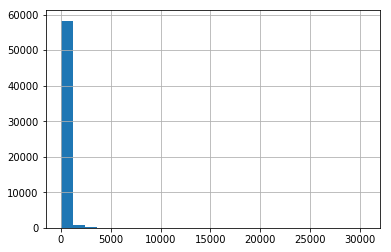

In [175]:
df_num['population'].hist(bins=25)

In [176]:
df_num['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [177]:
df_num['population_logged'] = np.log(df_num['population'])
df_num.head()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded,population_logged
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1,4.691348
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1,5.634790
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1,5.521461
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0,4.060443
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25,1,-inf


In [178]:
# Re-do 'poplation_logged'
df_num = df_num.drop('population_logged', axis=1)
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0
4,19728,0.0,0,31.130847,-1.825359,18,1,0,1986,functional,2011,25,1


In [179]:
df_num['population'] = df_num['population'].replace(0, 1)
df_num['population'].describe()

count    59400.000000
mean       180.269933
std        471.345047
min          1.000000
25%          1.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [180]:
df_num['population_logged'] = np.log(df_num['population'])
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,target,year_recorded,age,target_encoded,population_logged
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,functional,2011,12,1,4.691348
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,functional,2013,3,1,5.634790
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,functional,2013,4,1,5.521461
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,non functional,2013,27,0,4.060443
4,19728,0.0,0,31.130847,-1.825359,18,1,1,1986,functional,2011,25,1,0.000000


In [181]:
df_num.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'construction_year',
       'target', 'year_recorded', 'age', 'target_encoded',
       'population_logged'],
      dtype='object')

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_num.drop(['id','target','target_encoded', 'construction_year', 'year_recorded', 'population'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=100).fit(X_train_scaled, y_train)

print("Training score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

Training score: 0.65
Testing score: 0.65


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


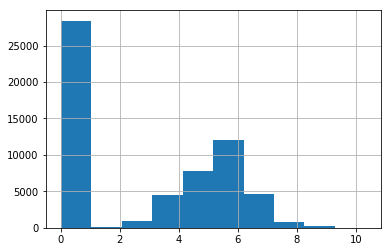

In [183]:
df_num['population_logged'].hist()

In [184]:
# target is obj datatype so I'm going to pop it off

target = df_num.pop('target')

In [185]:
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,age,target_encoded,population_logged
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,2011,12,1,4.691348
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,2013,3,1,5.634790
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,2013,4,1,5.521461
3,67743,0.0,263,38.486161,-11.155298,90,63,58,1986,2013,27,0,4.060443
4,19728,0.0,0,31.130847,-1.825359,18,1,1,1986,2011,25,1,0.000000


In [186]:
from scipy import stats

df_num = df_num[np.abs(stats.zscore(df_num) < 3).all(axis=1)]
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,age,target_encoded,population_logged
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,2011,12,1,4.691348
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,2013,3,1,5.634790
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,2013,4,1,5.521461
4,19728,0.0,0,31.130847,-1.825359,18,1,1,1986,2011,25,1,0.000000
5,9944,20.0,0,39.172796,-4.765587,4,8,1,2009,2011,2,1,0.000000


In [187]:
df_num.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,age,target_encoded,population_logged
count,54988.000000,54988.000000,54988.000000,54988.000000,5.498800e+04,54988.000000,54988.000000,54988.000000,54988.000000,54988.000000,54988.00000,54988.000000,54988.000000
mean,37150.538699,225.361331,692.067542,33.734940,-5.472505e+00,11.266495,3.788499,135.797465,1992.836528,2011.879628,19.04310,0.626864,2.593936
std,21465.348540,779.267502,701.809590,6.684306,2.861192e+00,6.502392,4.198054,228.101133,11.068759,0.949526,10.91951,0.483642,2.671544
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,1.000000,1960.000000,2002.000000,-7.00000,0.000000,0.000000
25%,18536.750000,0.000000,0.000000,32.991774,-8.108549e+00,5.000000,2.000000,1.000000,1986.000000,2011.000000,9.00000,0.000000,0.000000
50%,37112.500000,0.000000,446.000000,34.734512,-4.816382e+00,12.000000,3.000000,10.000000,1986.000000,2011.000000,25.00000,1.000000,2.302585
75%,55705.250000,20.000000,1341.000000,36.873983,-3.295890e+00,17.000000,5.000000,200.000000,2003.000000,2013.000000,26.00000,1.000000,5.298317
max,74247.000000,9000.000000,2628.000000,40.231707,-2.000000e-08,60.000000,33.000000,1590.000000,2013.000000,2013.000000,52.00000,1.000000,7.371489


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_num.drop(['id', 'target_encoded', 'construction_year', 'year_recorded', 'population'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=100).fit(X_train_scaled, y_train)

print("Training score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Testing score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score: 0.66
Testing score: 0.65


In [190]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, X_test, y_test)
print("Cross Validation scores: {}".format(scores))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation scores: [0.64761074 0.65080751 0.65233522]


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

# dropping 'target_encoded' because it's a target, and 'id' and 'num_private' have zero informational value
X = df_num.drop(['id', 'target_encoded', 'population'], axis=1)
y = df_num['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)

print("Training score: {:.2f}".format(rf.score(X_train, y_train)))
print("Testing score: {:.2f}".format(rf.score(X_test, y_test)))

Training score: 0.90
Testing score: 0.77


In [201]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(rf, X_test, y_test)
print("Cross Validation scores: {}".format(scores))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation scores: [0.73401702 0.73461371 0.71890004]


In [192]:
df_num.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,age,target_encoded,population_logged
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,1999,2011,12,1,4.691348
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,2010,2013,3,1,5.634790
2,34310,25.0,686,37.460664,-3.821329,21,4,250,2009,2013,4,1,5.521461
4,19728,0.0,0,31.130847,-1.825359,18,1,1,1986,2011,25,1,0.000000
5,9944,20.0,0,39.172796,-4.765587,4,8,1,2009,2011,2,1,0.000000


In [202]:
df_num['amount_tsh'].value_counts()

0.00       39014
500.00      3037
50.00       1916
1000.00     1457
20.00       1198
200.00      1193
100.00       722
2000.00      695
10.00        689
250.00       562
30.00        536
300.00       519
5000.00      436
5.00         373
3000.00      330
25.00        311
1200.00      267
1500.00      194
6.00         190
600.00       175
4000.00      156
2400.00      145
2500.00      137
6000.00      124
7.00          69
8000.00       60
750.00        59
40.00         45
3600.00       42
450.00        42
           ...  
15.00         13
7200.00       12
1300.00       10
6500.00        9
7500.00        8
35.00          8
7000.00        7
3500.00        5
5500.00        5
550.00         3
350.00         3
9000.00        3
0.20           3
4500.00        2
520.00         2
60.00          2
590.00         2
800.00         2
53.00          1
8500.00        1
9.00           1
6300.00        1
59.00          1
900.00         1
1400.00        1
70.00          1
0.25           1
1.00          

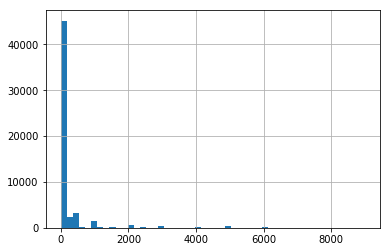

In [203]:
df_num['amount_tsh'].hist(bins=50)

In [212]:
from sklearn.preprocessing import StandardScaler

amount_tsh = df_num['amount_tsh'].values.reshape(-1, 1)
scaler = StandardScaler()
amount_tsh = scaler.fit_transform(amount_tsh)


In [213]:
amount_tsh

array([[ 7.41040934],
       [-0.289199  ],
       [-0.2571173 ],
       ...,
       [-0.289199  ],
       [-0.289199  ],
       [-0.289199  ]])

In [225]:
amount_tsh = amount_tsh.reshape(-1,)
amount_tsh

array([ 7.41040934, -0.289199  , -0.2571173 , ..., -0.289199  ,
       -0.289199  , -0.289199  ])

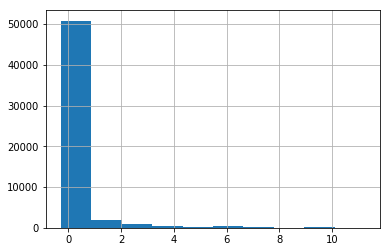

In [226]:

s = pd.Series(amount_tsh)
s.hist()

In [228]:
df_num['amount_tsh'].values

array([6000.,    0.,   25., ...,    0.,    0.,    0.])

In [232]:
df_num['amount_tsh'].values.reshape(-1, 1).reshape(-1)

array([6000.,    0.,   25., ...,    0.,    0.,    0.])

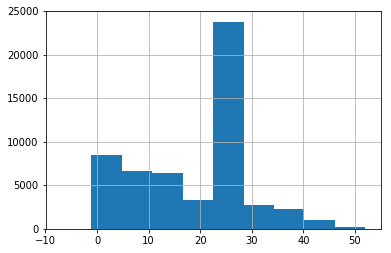

In [233]:
df_num['age'].hist()

In [237]:
target.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: target, dtype: float64